# Importing labraries and data frames

In [132]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# Q1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [133]:
path = r"C:\Users\solza\Downloads\12-2022 Instacart Basket Analysis"

In [134]:
# Importing merged_final.pkl file
ords_prods_custs = pd.read_pickle (os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_final.pkl'))

# Q2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.¶

Reflection: customer data set has a lot of PII data, including names, address and salary. These PII data will not be removed as it is not specified in the project brief.

# Q3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

  - Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions)
 
 

In [135]:
ords_prods_custs['state'].head()

0    Alabama
1    Alabama
2    Alabama
3    Alabama
4    Alabama
Name: state, dtype: object

In [136]:
# Creating region category under a Region list
Region = []

for value in ords_prods_custs ['state']:
 if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    Region.append('North East')
 elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    Region.append('Midwest')
 elif value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana':
    Region.append('South')
 else:
    Region.append('West')
    

In [137]:
# Creating region column and assign the Region list value to it,
ords_prods_custs['region'] = Region

In [138]:
# Printing ords_ords_prods to check if the new column, region, is added
ords_prods_custs.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2,2,473747,1,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4,4,431534,1,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


- Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.) 

In [139]:
# crossing spender_flag and region variable
pd.crosstab(ords_prods_custs['spending_flag'], ords_prods_custs['region'])

region,Midwest,North East,South,West
spending_flag,,,,
High spender,155975,108225,209691,160354
Low spender,7441350,5614511,10582194,8132559


In [140]:
ords_prods_custs.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2,2,473747,1,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4,4,431534,1,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


# Q4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [141]:
# First step: creating a new column that stores customers order number

ords_prods_custs['max_order'] = ords_prods_custs.groupby(['user_id']) ['order_number'].transform(np.sum)

In [142]:
ords_prods_custs.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,first_name,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2,2,473747,1,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4,4,431534,1,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [143]:
# Creating exclusion flag nammed as 'activity_flag'
ords_prods_custs.loc[ords_prods_custs['max_order']<5, 'activity_flag'] = 'low_activity_customer'
ords_prods_custs.loc[ords_prods_custs['max_order']>=5, 'activity_flag'] = 'normal_activity_customer'

In [144]:
ords_prods_custs.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
2,2,2,473747,1,3,3,12,21.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
4,4,4,431534,1,5,4,15,28.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer


In [145]:
# Checking where this low activity customers are located 
pd.crosstab(ords_prods_custs['activity_flag'], ords_prods_custs['region'])

region,Midwest,North East,South,West
activity_flag,,,,
low_activity_customer,3,0,0,0
normal_activity_customer,7597322,5722736,10791885,8292913


In [146]:
# to find for the frequency how many law activity customers
ords_prods_custs['activity_flag']. value_counts(dropna=False)

normal_activity_customer    32404856
low_activity_customer              3
Name: activity_flag, dtype: int64

In [147]:
len(ords_prods_custs['activity_flag'])


32404859

In [148]:
# Creating a subset data set for the low_activity__customer column values 
low_activity_custs = ords_prods_custs[ords_prods_custs['activity_flag'] == 'low_activity_customer']

In [149]:
low_activity_custs

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag
10802959,2072719,2072719,431592,124615,2,0,19,30.0,13176,1,...,Mckay,Female,Nebraska,71,5/9/2018,2,married,36565,Midwest,low_activity_customer
10802960,2072718,2072718,1492041,124615,1,5,9,NaN,30450,1,...,Mckay,Female,Nebraska,71,5/9/2018,2,married,36565,Midwest,low_activity_customer
32378243,1523852,1523852,3033384,91567,2,2,14,2.0,6873,1,...,Steele,Female,Nebraska,61,6/5/2018,0,divorced/widowed,153765,Midwest,low_activity_customer


In [150]:
# Exporting low_activity_custs dataset

low_activity_custs.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [151]:
# Creating a datframe of customers with normal activity (using subsetting method)

ords_prods_custs_normal = ords_prods_custs[ords_prods_custs['activity_flag'] == 'normal_activity_customer']

In [152]:
# Calling ords_prods_custs_normal
ords_prods_custs_normal.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,last_name,gender,state,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
2,2,2,473747,1,3,3,12,21.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer
4,4,4,431534,1,5,4,15,28.0,196,1,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,normal_activity_customer


In [153]:
# To make sure that the inactive customers, or low_activity_customer are excluded from the new ords_prods_custs_normal dataframe
ords_prods_custs_normal['activity_flag'].value_counts(dropna = False)

normal_activity_customer    32404856
Name: activity_flag, dtype: int64

 - Note: law_activity_customer are now excluded.

## Q5 - Q7

# Q5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

# Q6: Create an appropriate visualization to show the distribution of profiles.

# Q7:Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [154]:
# Printing descriptive statistics to understanding the values for categorizing ( giving a clue on the max, min, mean of the age)
ords_prods_custs_normal['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

1. Age Profiling

Customers age less than 35 years old = young adults

Customers age greater than 35 years old and less than 65 years old = middle aged adult

Customers age greater than 65 = old adults

In [155]:
ords_prods_custs_normal.loc[ords_prods_custs_normal['age'] <=35, 'age_group'] = 'Young adult'

C:\Users\solza\AppData\Local\Temp\ipykernel_15864\2735844239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[ords_prods_custs_normal['age'] <=35, 'age_group'] = 'Young adult'


In [156]:
ords_prods_custs_normal.loc[(ords_prods_custs['age'] <65) & (ords_prods_custs_normal['age'] >35), 'age_group'] = 'Middle-aged adult'

In [157]:
ords_prods_custs_normal.loc[ords_prods_custs_normal['age'] >=60, 'age_group'] = 'Old adult'

In [158]:
# crosstab'age_group' column by the region column
age_reg =pd.crosstab(ords_prods_custs_normal['age_group'], ords_prods_custs_normal['region'])

In [159]:
# calling age_reg
age_reg

region,Midwest,North East,South,West
age_group,,,,
Middle-aged adult,2913052,2126330,4019241,3132562
Old adult,2569535,1973103,3685583,2839031
Young adult,2114735,1623303,3087061,2321320


In [160]:
# Printing the frequency of age_flag column
ords_prods_custs_normal['age_group'].value_counts(dropna=False)

Middle-aged adult    12191185
Old adult            11067252
Young adult           9146419
Name: age_group, dtype: int64

In [161]:
# Aggregate for age group useage frequency

ords_prods_custs_normal.groupby('age_group').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                    mean  min   max
age_group                                          
Middle-aged adult              11.098956  0.0  30.0
Old adult                      11.092551  0.0  30.0
Young adult                    11.124858  0.0  30.0

In [162]:
# Aggregate for age group expenditure 
ords_prods_custs_normal.groupby('age_group').agg({'prices':['mean', 'min','max']})

prices              
                        mean  min      max
age_group                                 
Middle-aged adult  12.068365  1.0  99999.0
Old adult          11.763337  1.0  99999.0
Young adult        12.125184  1.0  99999.0

  2. Income Profiling

  Customers salary less than 100,000 = low income
  
  Customers salary between 100,000 - 200,000 = middle income
  
  Customers salary between 200,000 - 400,000 = upper middle income
  
  Customers salary between >400,000 = high income 

In [163]:
# Printing descriptive statistics of income column to understanding the values for categorizing ( giving a clue on the max, min, mean of the age)
ords_prods_custs_normal['income'].describe()

count    3.240486e+07
mean     9.943774e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [164]:
ords_prods_custs_normal.loc[ords_prods_custs_normal['income']<=100000, 'income_group'] = 'low income'

C:\Users\solza\AppData\Local\Temp\ipykernel_15864\3115267380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[ords_prods_custs_normal['income']<=100000, 'income_group'] = 'low income'


In [165]:
ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']>100000) & (ords_prods_custs_normal['income'] <= 200000), 'income_group'] = 'middle income'

In [166]:
ords_prods_custs_normal.loc[(ords_prods_custs_normal['income']>200000) & (ords_prods_custs_normal['income']<=400000), 'income_group'] = 'upper middle income'

In [167]:
ords_prods_custs_normal.loc[ords_prods_custs_normal['income'] >400000, 'income_group'] = 'high income'

In [168]:
ords_prods_custs_normal['income_group'].value_counts (dropna = False)

low income             17590655
middle income          14555758
upper middle income      210751
high income               47692
Name: income_group, dtype: int64

In [169]:
# Aggregate for income group useage frequency

ords_prods_custs_normal.groupby('income_group').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                      mean  min   max
income_group                                         
high income                      10.424753  0.0  30.0
low income                       11.158293  0.0  30.0
middle income                    11.055037  0.0  30.0
upper middle income              10.148940  0.0  30.0

In [170]:
# Aggregate for age group expenditure 
ords_prods_custs_normal.groupby('income_group').agg({'prices':['mean', 'min','max']})

prices              
                           mean  min      max
income_group                                 
high income          227.570947  1.0  99999.0
low income             8.106621  1.0  99999.0
middle income         12.174177  1.0  99999.0
upper middle income  273.113910  1.0  99999.0

3. profiling department_id

In [171]:
# Importing departments dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'department_wrangled.csv'))

In [172]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [173]:
# Renaming Undamed:0 column to department_id
df_dept.rename(columns ={'Unnamed: 0': 'department_id'}, inplace = True)

In [174]:
# Calling df_dept to check the change 
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [175]:
# Turning department dataframe into data dictionary
zipped=zip(df_dept['department_id'], df_dept['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [176]:
# Connect department names to department_id dataframe
ords_prods_custs_normal['department'] = ords_prods_custs_normal['department_id'].map(data_dict)

C:\Users\solza\AppData\Local\Temp\ipykernel_15864\3186207838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal['department'] = ords_prods_custs_normal['department_id'].map(data_dict)


In [177]:
ords_prods_custs_normal.head(60)

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,age,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_group,income_group,department
0,0,0,2539329,1,1,2,8,NaN,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
1,1,1,2398795,1,2,3,7,15.0,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
2,2,2,473747,1,3,3,12,21.0,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
3,3,3,2254736,1,4,4,7,29.0,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
4,4,4,431534,1,5,4,15,28.0,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
5,5,5,3367565,1,6,2,7,19.0,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
6,6,6,550135,1,7,1,9,20.0,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
7,7,7,3108588,1,8,1,14,14.0,196,2,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
8,8,8,2295261,1,9,1,16,0.0,196,4,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages
9,9,9,2550362,1,10,4,8,30.0,196,1,...,31,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages


 department_baby profining

In [178]:
# Creating babay department flag column

ords_prods_custs_normal['baby_status'] = [1 if x == 'babies' else 0 for x in ords_prods_custs_normal['department']]

C:\Users\solza\AppData\Local\Temp\ipykernel_15864\3868812213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal['baby_status'] = [1 if x == 'babies' else 0 for x in ords_prods_custs_normal['department']]


In [179]:
ords_prods_custs_normal.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,date_joined,no_of_dependents,marital_status,income,region,activity_flag,age_group,income_group,department,baby_status
0,0,0,2539329,1,1,2,8,NaN,196,1,...,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0
1,1,1,2398795,1,2,3,7,15.0,196,1,...,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0
2,2,2,473747,1,3,3,12,21.0,196,1,...,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0
3,3,3,2254736,1,4,4,7,29.0,196,1,...,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0
4,4,4,431534,1,5,4,15,28.0,196,1,...,2/17/2019,3,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0


In [180]:
# Grouping and aggregatng userid by baby_status
ords_prods_custs_normal['baby_status'] = ords_prods_custs_normal.groupby(['user_id']) ['baby_status'].transform(np.max)

C:\Users\solza\AppData\Local\Temp\ipykernel_15864\3575448238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal['baby_status'] = ords_prods_custs_normal.groupby(['user_id']) ['baby_status'].transform(np.max)


In [181]:
# Checking column baby_status
ords_prods_custs_normal['baby_status'].value_counts(dropna= False)

0    22431547
1     9973309
Name: baby_status, dtype: int64

In [182]:
# Aggregate for baby_status useage frequency

ords_prods_custs_normal.groupby('baby_status').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                              mean  min   max
baby_status                                  
0                        11.848431  0.0  30.0
1                         9.479345  0.0  30.0

In [183]:
# Aggregate for age group expenditure 
ords_prods_custs_normal.groupby('baby_status').agg({'prices':['mean', 'min', 'max']})

prices              
                  mean  min      max
baby_status                         
0            12.515292  1.0  99999.0
1            10.776779  1.0  99999.0

3. Profiling Frozen

In [184]:
# creating personal care flag

ords_prods_custs_normal['frozen_status'] = [1 if x == 'frozen' else 0 for x in ords_prods_custs_normal['department']]

C:\Users\solza\AppData\Local\Temp\ipykernel_15864\3791756509.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal['frozen_status'] = [1 if x == 'frozen' else 0 for x in ords_prods_custs_normal['department']]


In [185]:
# Grouping and aggregating

ords_prods_custs_normal['frozen_status'] = ords_prods_custs_normal.groupby(['user_id'])['frozen_status'].transform(np.max)


C:\Users\solza\AppData\Local\Temp\ipykernel_15864\2068799040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal['frozen_status'] = ords_prods_custs_normal.groupby(['user_id'])['frozen_status'].transform(np.max)


In [186]:
# Printing frequency of frozen_status column
ords_prods_custs_normal['frozen_status'].value_counts(dropna = False)

1    29982447
0     2422409
Name: frozen_status, dtype: int64

In [187]:
# Aggregate for frozen_status useage frequency

ords_prods_custs_normal.groupby('frozen_status').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                mean  min   max
frozen_status                                  
0                          13.087350  0.0  30.0
1                          10.951872  0.0  30.0

In [188]:
# Aggregate frozen_status expenditure 
ords_prods_custs_normal.groupby('frozen_status').agg({'prices':['mean', 'min','max']})

prices              
                    mean  min      max
frozen_status                         
0              12.449998  1.0  99999.0
1              11.942271  1.0  99999.0

 profiling number of dependents

 - n_dependants = 0, single household
 - n_dependants between 1-2, small household
 - n_dependants between 2-3, large household

In [189]:
# Printing simple statistics of the n_dependants column to determing the profiling/grouping 
ords_prods_custs_normal['no_of_dependents'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependents, dtype: float64

In [190]:
ords_prods_custs_normal.loc[ords_prods_custs_normal['no_of_dependents'] <=0, 'household_size'] = 'single household'

C:\Users\solza\AppData\Local\Temp\ipykernel_15864\1529374105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ords_prods_custs_normal.loc[ords_prods_custs_normal['no_of_dependents'] <=0, 'household_size'] = 'single household'


In [191]:
ords_prods_custs_normal.loc[(ords_prods_custs_normal['no_of_dependents']>1) & (ords_prods_custs_normal['no_of_dependents'] <= 2), 'household_size'] = 'small family'

In [192]:
ords_prods_custs_normal.loc[(ords_prods_custs_normal['no_of_dependents'] >2) & (ords_prods_custs_normal['no_of_dependents'] <= 3), 'household_size'] = 'medium family'

In [193]:
# Frequency of household_size column to make sure that the household grouping is updated 
ords_prods_custs_normal['household_size'].value_counts(dropna = False)

medium family       8135109
single household    8097502
small family        8091141
NaN                 8081104
Name: household_size, dtype: int64

In [194]:
# Aggregate for household_size useage frequency

ords_prods_custs_normal.groupby('household_size').agg({'days_since_prior_order':['mean', 'min','max']})

days_since_prior_order           
                                   mean  min   max
household_size                                    
medium family                 11.109714  0.0  30.0
single household              11.080806  0.0  30.0
small family                  11.125754  0.0  30.0

In [195]:
# Aggregate for household_size expenditure 
ords_prods_custs_normal.groupby('household_size').agg({'prices':['mean', 'min','max']})

prices              
                       mean  min      max
household_size                           
medium family     11.793264  1.0  99999.0
single household  12.129242  1.0  99999.0
small family      12.369545  1.0  99999.0

In [196]:
# creating a crosstab containing orders_day_of_week by householdsize columns
shopping = pd.crosstab(ords_prods_custs_normal['orders_day_of_week'], ords_prods_custs_normal['household_size'])

In [197]:
# calling shopping crosstab created above
shopping

household_size,medium family,single household,small family
orders_day_of_week,,,
0,1564100,1550309,1545873
1,1426184,1424767,1399722
2,1066795,1049128,1051708
3,962026,959353,964243
4,943931,945205,946691
5,1044235,1057145,1054316
6,1127838,1111595,1128588


In [198]:
# creating a shopping_hour crosstab containing order_hour_of_day and house_size columns
shopping_hour = pd.crosstab(ords_prods_custs_normal['order_hour_of_day'], ords_prods_custs_normal['household_size'])

In [199]:
# calling shopping_hour crosstab
shopping_hour.head()

household_size,medium family,single household,small family
order_hour_of_day,,,
0,54508,54172,55943
1,29478,28342,28888
2,16901,17569,16819
3,13161,13015,12534
4,13451,12739,12791


In [200]:
# loyalty_flag by household_size
loyal_household = pd.crosstab(ords_prods_custs_normal['loyalty_flag'], ords_prods_custs_normal['household_size'])

In [201]:
# calling loyal_household crosstab
loyal_household

household_size,medium family,single household,small family
loyalty_flag,,,
Loyal customer,2582679,2588844,2553601
New customer,1559095,1559086,1553941
Regular customer,3993335,3949572,3983599


#### Visualization to show the distribution of profiles

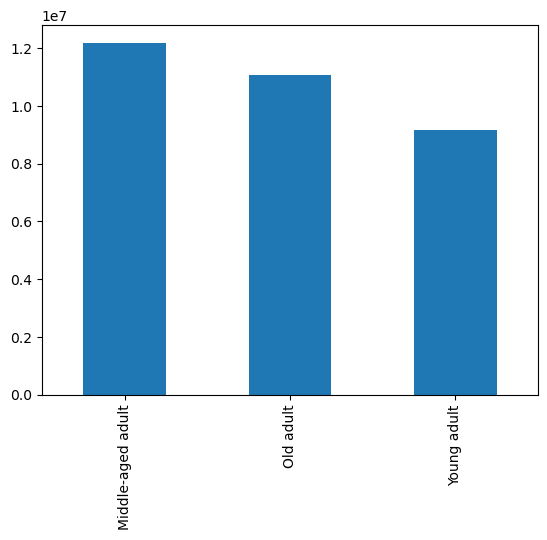

In [202]:
# Creating a bar chart for the age_group
bar1 = ords_prods_custs_normal ['age_group'].value_counts().plot.bar()

 **Note**:The bar chart above shows that most of the customers are middle-age and old adult agroups, middle-aged adult taking the larger share, followed by young adult.

In [203]:
# Exporting bar1 chart
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'bar_age_group.png'))

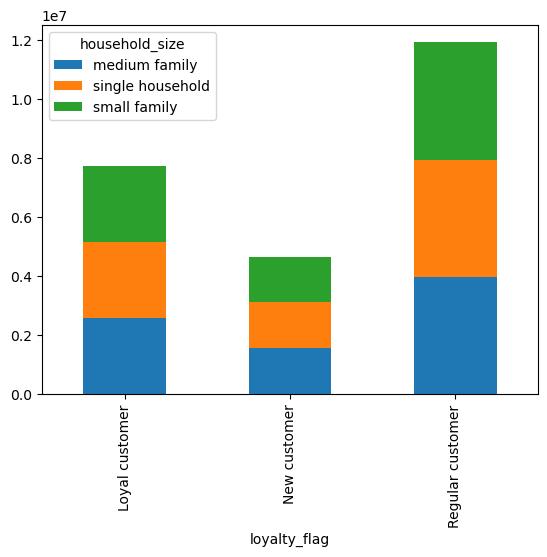

In [204]:
# Age region bar chart 
bar2 = loyal_household.plot(kind= 'bar', stacked = True)

In [205]:
pd.crosstab(ords_prods_custs_normal['loyalty_flag'], ords_prods_custs_normal['household_size'])

household_size,medium family,single household,small family
loyalty_flag,,,
Loyal customer,2582679,2588844,2553601
New customer,1559095,1559086,1553941
Regular customer,3993335,3949572,3983599


- **Note**: Most of customers are in the regular customer category. From the regular customers, majority of them are middle family size (having 2-3 number of dependants). Single households are also more loyal customers compared to other groups of customers. 

In [206]:
# Exporting bar2 chart
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'loyal_household.png'))

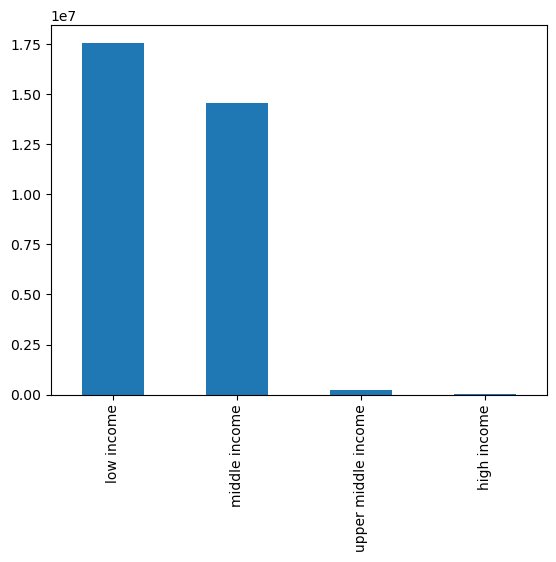

In [207]:
# Bar chart customer by income group
bar3 = ords_prods_custs_normal['income_group'].value_counts().plot.bar()

 - The bar chart shows that majority of customers are low income (<USD 100,000) and middle income (USD between 100,000-200,000) customers. There are few customers that are upper middle income (btween USD200,000-400,000) and high income (>USD 400,000).

In [208]:
# Exporting bar3 chart above
bar3.figure.savefig(os.path.join(path, '04 Analysis', 'income_group.png'))

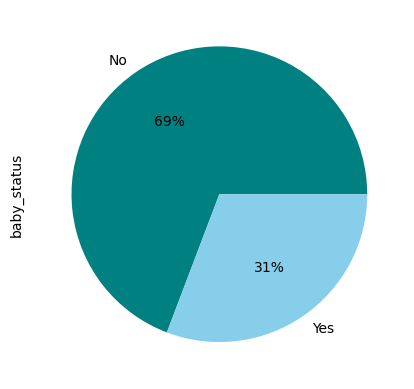

In [209]:
# Creating a pie chart for the baby_status column
pie1 = ords_prods_custs_normal['baby_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['teal','skyblue'])

 - **Note**: The pie chart shows that 31% of the total products sold are babies products.

In [210]:
# Exporting pie1
pie1.figure.savefig(os.path.join(path, '04 Analysis', 'baby_satus.png'))

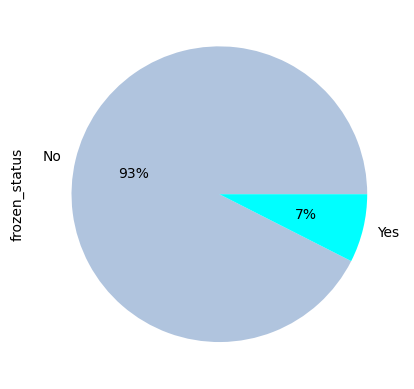

In [211]:
# Creating a pie chart for the frozen_status column
pie2 = ords_prods_custs_normal['frozen_status'].value_counts().plot.pie(labels=['No', 'Yes'], autopct=('%1.f%%'), colors=['lightsteelblue','cyan'])

- **Note**: the pie chart shows that 7% of the total products sold are frozen items. 

In [212]:
# Exporting pie2 above 
pie2.figure.savefig(os.path.join(path, '04 Analysis', 'frozen_status.png'))

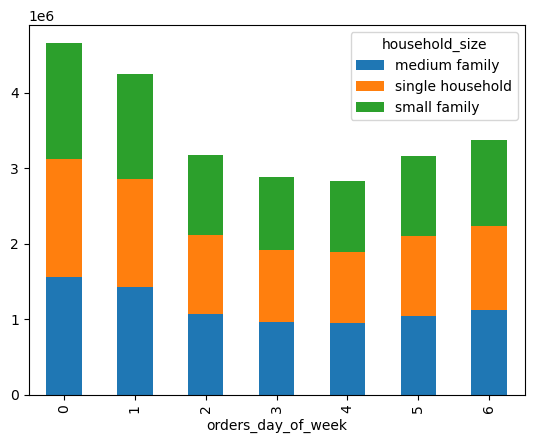

In [213]:
# Order day of the week by household size
bar4 = shopping.plot(kind= 'bar', stacked = True)

- **Note**: The bar chart shows that all size of households are busy shopping on Saturday!

In [214]:
# Exporting bar4 chart above
bar4.figure.savefig(os.path.join(path, '04 Analysis', 'HH_shopping_day.png'))

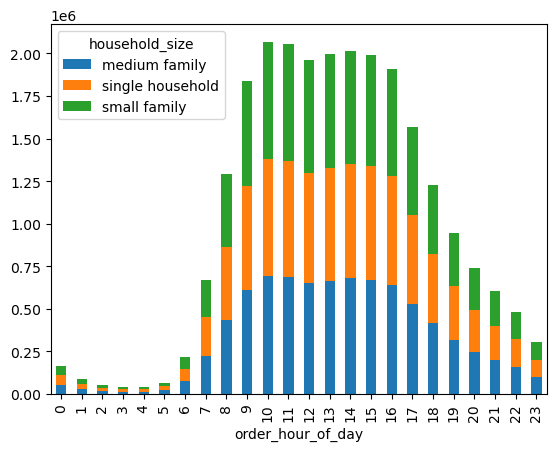

In [215]:
# Creating a bar chart for household size by order_our_of_day column
bar5 = shopping_hour.plot(kind= 'bar', stacked = True)

**Note**:

 - The bar chart shows that most of the orders come in between 10-16 o'clock (10am-4pm) regardless of customers' family size.


  -  Starting from 7 o'clock onwards orders start to rise up and reamin high until 15 o'clock (3pm). After 3pm, they start to decline. 
  

- And during 0-6 o'clock (mid-night to 6am) orders reach the most minimum record. 


- As we can see from the bar chart above, the distribution is skewed to the right, i.e., mean > median. 

In [216]:
# Exporting bar5 chart above
bar5.figure.savefig(os.path.join(path, '04 Analysis', 'HH_shopping_hour.png'))

### Q8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Q9. Produce suitable charts to illustrate your results and export them in your project folder.


Customers age group by region

In [217]:
age_region=pd.crosstab(ords_prods_custs_normal['age_group'], ords_prods_custs_normal['region'])

In [218]:
# caling age_region
age_region

region,Midwest,North East,South,West
age_group,,,,
Middle-aged adult,2913052,2126330,4019241,3132562
Old adult,2569535,1973103,3685583,2839031
Young adult,2114735,1623303,3087061,2321320


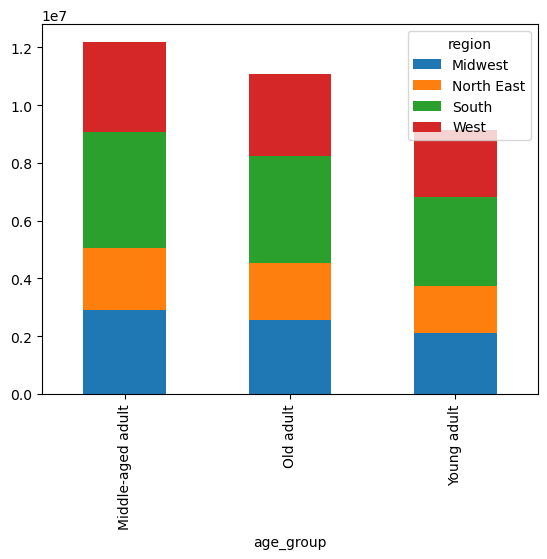

In [219]:
# Creatinga bar chart for age_region crosstab
bar6 = age_region.plot(kind= 'bar', stacked = True)

- **Note**: customer age groups are proportional across regions. However, the South region happened to have relatively more number of customers for all the age groups.

In [220]:
#Exporting bar6 chart
bar6.figure.savefig(os.path.join(path, '04 Analysis', 'bar_ageGroup_region.png'))

**Customers age group by department**

In [221]:
# Creating age_dept crosstab
age_dept=pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['age_group'])

In [222]:
# Calling age_dept
age_dept

age_group,Middle-aged adult,Old adult,Young adult
department,,,
alcohol,58105,50664,44927
babies,163485,142912,117405
bakery,440526,400020,331882
beverages,1014176,923708,750239
breakfast,263525,238897,200611
bulk,12843,11803,9927
canned goods,401142,363738,303178
dairy eggs,2026653,1838082,1534012
deli,394560,359502,297187


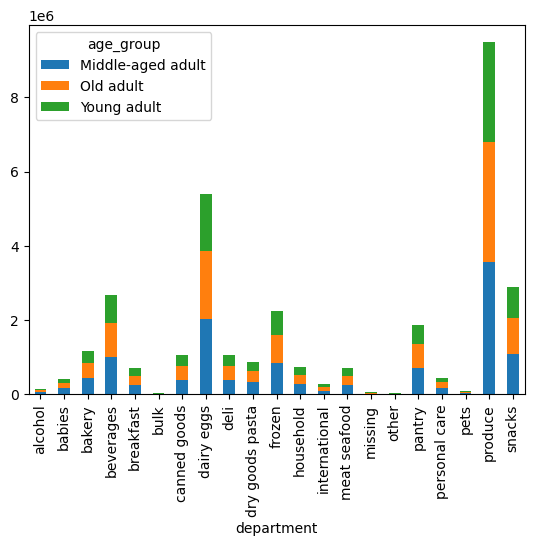

In [223]:
# Creatinga bar chart for age_dept crosstab
bar7 = age_dept.plot(kind= 'bar', stacked = True)

Reflection: the bar chart shows that the produce department has registered the highest sale across all age groups followed by dairy eggs, snacks and beverages departments respectively.

Most of customers for produce and dairy eggs departments are middle-aged adults followed by old adults and young adults.

Most of the customers for the beverages department are middle-aged adults followed by young adults and old adults.

In [224]:
# Exporting bar7 chart above
bar7.figure.savefig(os.path.join(path, '04 Analysis', 'age_group.png'))

Customers age income group by region

In [225]:
age_region=pd.crosstab(ords_prods_custs_normal['income_group'], ords_prods_custs_normal['region'])


In [226]:
age_region

region,Midwest,North East,South,West
income_group,,,,
high income,16606,6857,12394,11835
low income,4057408,3094323,5926517,4512407
middle income,3474617,2587286,4780522,3713333
upper middle income,48691,34270,72452,55338


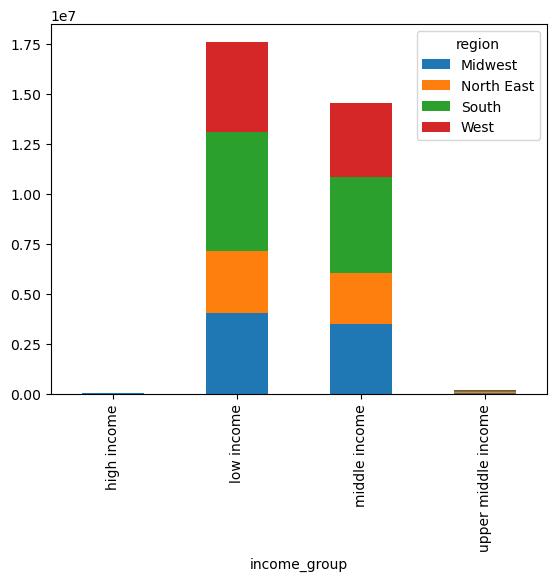

In [227]:
# Creating a bar for the age_region crosstab
bar8 = age_region.plot(kind= 'bar', stacked = True)

Reflection: The bar chart shows that customers from the Southern regions dominates both in the low income and middle income customers group followed by customers from West , Midwest and North East regions respectively.

In [228]:
# Exporting bar8 chart above
bar8.figure.savefig(os.path.join(path, '04 Analysis', 'age_region.png'))

**Customers' region by department**

In [229]:
# Creating a cross tab for department and region columns
region_dept=pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['region'])


In [230]:
# Calling region_dept cross tab
region_dept

region,Midwest,North East,South,West
department,,,,
alcohol,36186,26542,51624,39344
babies,98983,75139,143654,106026
bakery,273869,208599,388815,301145
beverages,625574,483418,898940,680191
breakfast,163551,123574,234251,181657
bulk,8193,5802,11533,9045
canned goods,250702,186755,356015,274586
dairy eggs,1264223,954026,1796969,1383529
deli,245678,186817,349419,269335


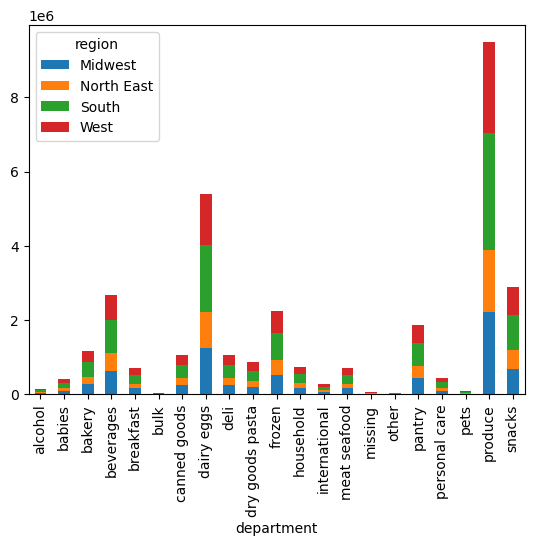

In [231]:
# Creating a bar chart for region_dept cross tab
bar9 = region_dept.plot(kind= 'bar', stacked = True)

Reflection: the bar chart shows that the produce department has registered the highest sale across all age groups followed by dairy eggs, snacks and beverages departments respectively.For all the top departments with the highest sales records, most of the customers are from the South region followed by West, Midwest and North East.

Bulk, Pets and Alcohol departments have the lowest customers number.

In [232]:
# Exporting bar9 chart above
bar9.figure.savefig(os.path.join(path, '04 Analysis', 'region_dept.png'))

**Customers' household size by region**

In [233]:
# Creating a cross tab for household_size and region columns
HHsize_reg=pd.crosstab(ords_prods_custs_normal['household_size'], ords_prods_custs_normal['region'])

In [234]:
HHsize_reg

region,Midwest,North East,South,West
household_size,,,,
medium family,1874667,1445080,2706538,2108824
single household,1905199,1418301,2701659,2072343
small family,1890984,1417102,2723958,2059097


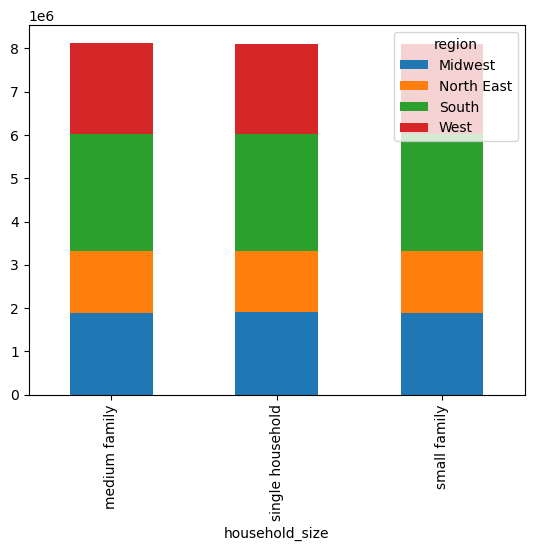

In [235]:
# Creating a bar chart for region_dept cross tab
bar10 = HHsize_reg.plot(kind= 'bar', stacked = True)

 **Reflection**:
 - Most of customers in South region are medium family, small family and single household respectively
 - Most of the customers in West and Midwest regions are medium family, single household and small family respectively
 - Most of customers in the North East region are single household, small family and medium family respectively

In [236]:
# Exporting bar10 chart above
bar10.figure.savefig(os.path.join(path, '04 Analysis', 'HHsixe_reg.png'))

**Customers' household size by department**

In [237]:
# Creating a cross tab for household_size and department columns
HHsize_dept=pd.crosstab(ords_prods_custs_normal['department'], ords_prods_custs_normal['household_size'])

In [238]:
HHsize_dept

household_size,medium family,single household,small family
department,,,
alcohol,39736,39118,36878
babies,106094,106494,107975
bakery,292859,294405,292171
beverages,670063,674442,675392
breakfast,175466,174577,175781
bulk,8685,8278,8762
canned goods,269614,264838,266477
dairy eggs,1351908,1349362,1343988
deli,264530,265145,262007


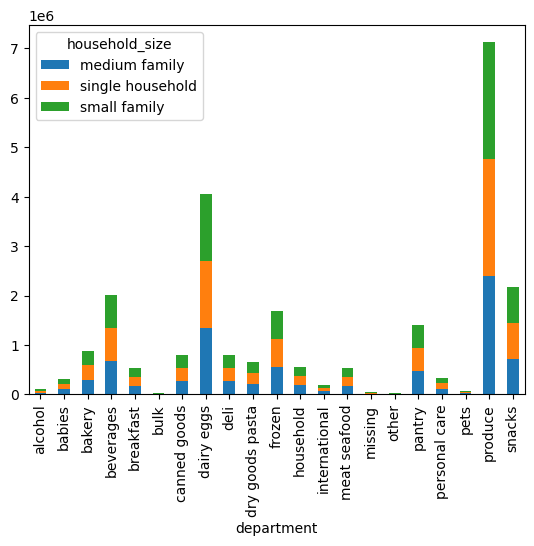

In [239]:
# Creating a bar chart for HHsize_dept cross tab
bar11 = HHsize_dept.plot(kind= 'bar', stacked = True)

Reflection:

Produce department: most of customers are single households followed by small families and medium families

Dairy eggs department: most of customers are medium families followed by single households and small families

Snacks department: most of customers are small families followed by medium families and single households

Bulk, Pets and Alcohol departments have the lowest customers number.

In [240]:
# Exporting bar11 chart above
bar11.figure.savefig(os.path.join(path, '04 Analysis','HHsize_dept.png'))

In [241]:
ords_prods_custs_normal.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,marital_status,income,region,activity_flag,age_group,income_group,department,baby_status,frozen_status,household_size
0,0,0,2539329,1,1,2,8,NaN,196,1,...,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0,0,medium family
1,1,1,2398795,1,2,3,7,15.0,196,1,...,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0,0,medium family
2,2,2,473747,1,3,3,12,21.0,196,1,...,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0,0,medium family
3,3,3,2254736,1,4,4,7,29.0,196,1,...,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0,0,medium family
4,4,4,431534,1,5,4,15,28.0,196,1,...,married,40423,South,normal_activity_customer,Young adult,low income,beverages,0,0,medium family
